In [ ]:
# <a href="https://colab.research.google.com/github/nachi-hebbar/ARIMA-Temperature_Forecasting/blob/master/Temperature_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     |████████████████████████████████| 631 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 624 kB/s eta 0:00:01    |█████████████████▋              | 9.7 MB 2.1 MB/s eta 0:00:04
     |████████████████████████████████| 9.6 MB 102 kB/s eta 0:00:01
     |████████████████████████████████| 233 kB 5.7 MB/s eta 0:00:01
  Created wheel for pmdarima: filename=pmdarima-1.8.4-cp38-cp38-macosx_10_14_x86_64.whl size=606341 sha256=bac5e5a9876d0de87a1fa14d3697ba10ba753080b214ed772cff0999d0ef5d32
  Stored in directory: /Users/komalrungta/Library/Caches/pip/wheels/d4/80/1f/742f33fd9c9d69cb41bc4604a74323c22e6df7911cbad196d1
Successfully built pmdarima
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodel

In [2]:
import pandas as pd
import numpy as np

#Read Data

In [3]:
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna() # drop missing values if any
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


#Plot Your Data
* We are interseted in the avg temp in this case
* We are going to build a model that forecasts how avg temp changes with time

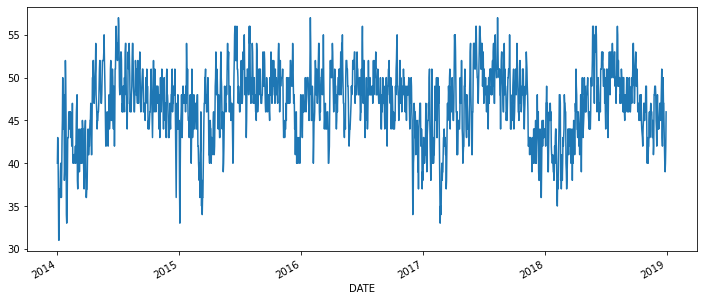

In [4]:
df['AvgTemp'].plot(figsize=(12,5));

#Check For Stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [6]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068778
2. P-Value :  8.675937480199557e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


#### Observations:
Since p-value < 0.05 which means Time Series is stationary.

#Figure Out Order for ARIMA Model

In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True ,# to print out as it iterates through each step
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.740, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.143, Time=2.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.644, Time=2.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.193, Time=2.24 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8309.880, Time=2.92 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.195, Time=3.06 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.630, Time=3.51 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.968, Time=3.21 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.951
Date:                Tue, 11 Jan 2022   AIC                           8295.902
Time:                        21:39:37   BIC                           8339.959
Sample:                             0   HQIC                          8312.155
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3794      0.399      3.455      0.001       0.597       2.162
ar.L1          0.9704      0.009    112.914      0.000       0.954       0.987
ma.L1         -0.1228      0.024     -5.131      0.000      -0.170      -0.076
ma.L2         -0.2162      0.024     -8.876      0.000      -0.264      -0.168
ma.L3         -0.2068      0.024     -8.601      0.000      -0.254      -0.160
ma.L4         -0.1346      0.023     -5.897      0.000      -0.179      -0.090
ma.L5         -0.0435      0.024     -1.785      0.074      -0.091       0.004
sigma2         5.4913      0.172     31.986      0.000       5.155       5.828
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.48
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [11]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [20]:
test

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-01,36.0,52.0,44.0,640,1743
2018-12-02,33.0,51.0,42.0,641,1743
2018-12-03,36.0,53.0,45.0,641,1743
2018-12-04,39.0,56.0,48.0,642,1743
2018-12-05,36.0,53.0,45.0,643,1743
2018-12-06,36.0,52.0,44.0,643,1743
2018-12-07,37.0,53.0,45.0,644,1744
2018-12-08,34.0,53.0,44.0,645,1744
2018-12-09,36.0,53.0,45.0,645,1744


## Train the Model

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Tue, 11 Jan 2022   AIC                           8156.395
Time:                        21:48:56   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961185
2018-12-16    45.970176
2018-12-17    45.979036
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045482
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Freq: D, Name: ARIMA predictions, dtype: float64


<AxesSubplot:xlabel='DATE'>

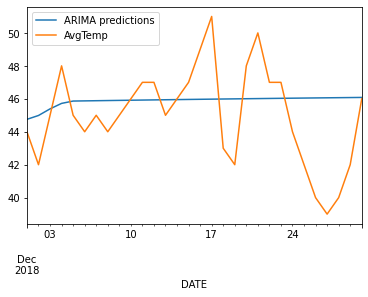

In [36]:
start=len(train) ## for forecasting starting length is where training set ends
end=len(train)+len(test)-1 ## end is the length of dataset (end of the dataset)
#if the predicted values dont have date values as index, you will have to uncomment the following two commented 
##lines to plot a graph as we need index values to be date only to plot graph it cannot be numbers
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
print(pred)
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)


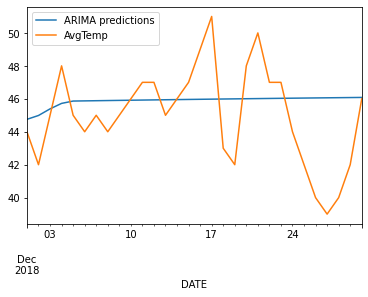

In [41]:
## plotting test & pred together
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True);

In [38]:
test['AvgTemp'].mean()

45.0

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)


3.000463921952861


#### Mean of dataset is 45.0 and error is 3 which is acceptable; if rmse has similar value to the mean of the dataset then the model wiil be unacceptable & treated as bad model.

## We have done the forecasting on test data & find out that the model is acceptable.
## let's do some forecasting for future, so let's train the entire dataset.

In [42]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


#For Future Dates

In [43]:
## so our dataset date value ends at 2018-12-30 so we are making prediction from the above model where the
## date starts from the end of our dataset tto next 30 days
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')#creating index for pred values as we want to plot the data
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates ## assingning the index created
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116915
2019-01-04    45.136665
2019-01-05    45.156139
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212941
2019-01-09    45.231348
2019-01-10    45.249497
2019-01-11    45.267392
2019-01-12    45.285037
2019-01-13    45.302435
2019-01-14    45.319590
2019-01-15    45.336504
2019-01-16    45.353182
2019-01-17    45.369626
2019-01-18    45.385841
2019-01-19    45.401828
2019-01-20    45.417592
2019-01-21    45.433135
2019-01-22    45.448461
2019-01-23    45.463572
2019-01-24    45.478472
2019-01-25    45.493163
2019-01-26    45.507649
2019-01-27    45.521932
2019-01-28    45.536015
2019-01-29    45.549902
Freq: D, Name: ARIMA Predictions, dtype: float64


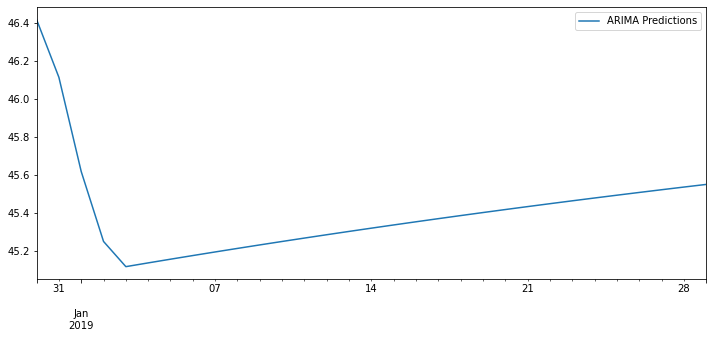

In [44]:
pred.plot(figsize=(12,5),legend=True);